## INIT

In [1]:
!rm -rf data __MACOSX output sample_data data.zip MLProject/
!git clone https://github.com/Claxl/MLProject
!mv MLProject/data.zip /content


Cloning into 'MLProject'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 20.33 MiB | 39.58 MiB/s, done.


In [2]:
!unzip -qq data.zip
!rm -rf __MACOSX output data.zip MLProject/

#DATA READ


In [73]:
import Utilitis
from sklearn.preprocessing import *
import matplotlib.pylab as plt
import pandas as pd

In [77]:

y_a, X_test_A, X_train_A = readData(1)
y_b, X_test_B, X_train_B= readData(2)
y_c, X_test_C, X_train_C = readData(2)

In [55]:
X_train_A_resize, y_train_A_resize = resize_training_data(X_train_A, y_a)


pandas.core.frame.DataFrame

# Feature Plot

In [71]:
def scale_df(df):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    return df_scaled

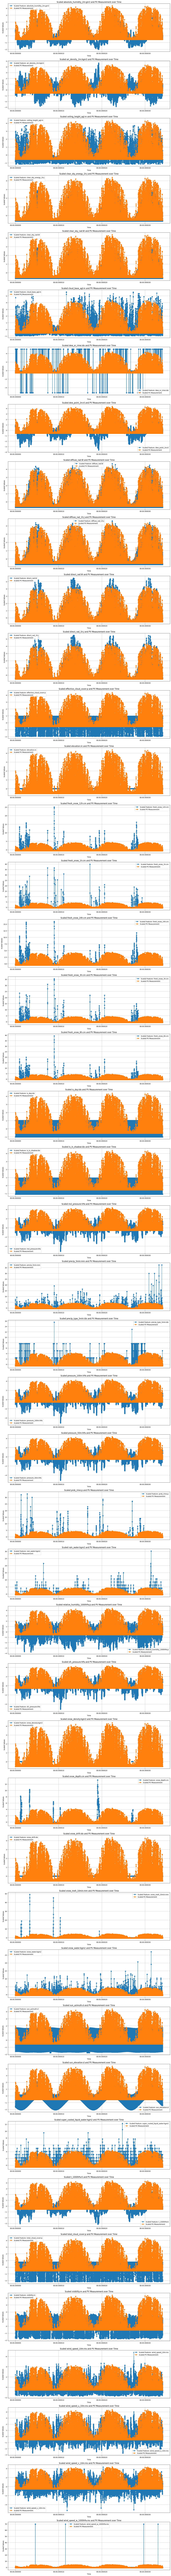

In [74]:
df = X_train_A_resize
df_target = y_train_A_resize

df.index = pd.to_datetime(df.index)
df_target.index = pd.to_datetime(df_target.index)

df_scaled = scale_df(df)
# Ensuring that df_target contains only numeric columns
df_target_numeric = df_target.select_dtypes(include=[np.number])
df_target_scaled = scale_df(df_target_numeric)

# Number of features to plot
num_features = len(df.columns)

# Creating a figure
plt.figure(figsize=(15, 5*num_features))

for i, col in enumerate(df.columns, 1):
    plt.subplot(num_features, 1, i)

    plt.plot( df_scaled[col], label=f'Scaled Feature: {col}', linestyle='-', marker='o')
    plt.plot( df_target_scaled['pv_measurement'], label='Scaled PV Measurement', linestyle='-', marker='o')

    plt.xlabel('Time')
    plt.ylabel('Scaled Values')
    plt.title(f'Scaled {col} and PV Measurement over Time')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

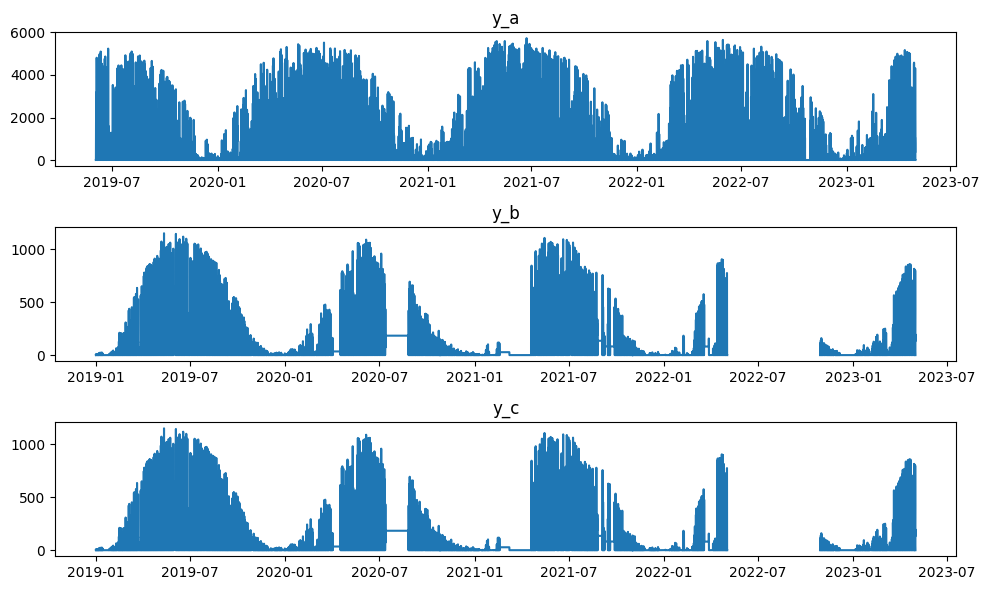

In [99]:
# Sort the data based on datetime
y_a.sort_values('time', inplace=True)
y_b.sort_values('time', inplace=True)
y_c.sort_values('time', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(y_a['time'], y_a['pv_measurement'])
plt.title('y_a')

plt.subplot(3, 1, 2)
plt.plot(y_b['time'], y_b['pv_measurement'])
plt.title('y_b')

plt.subplot(3, 1, 3)
plt.plot(y_c['time'], y_c['pv_measurement'])
plt.title('y_c')

plt.tight_layout()
plt.show()